My solution on IBM Cloud:

https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/6ab15ff3-fc47-4c96-bea1-44601228d1e2/view?access_token=d581f6f0012733ceea117d1edcea2d3c25d5e37c62446ebc7797cab617517612

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from jupyterthemes import jtplot
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

**Question 1**: Display the data types of each column.

In [2]:
# Import data 
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

**Question 2**: Drop the columns "id" and "Unnamed: 0" from axis 1 using the method `drop()`, then use the method `describe()` to obtain a statistical summary of the data.

In [3]:
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**Question 3**: Use the method `value_counts` to count the number of houses with unique floor values, use the method `to_frame()` to convert it to a dataframe.

In [4]:
df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


**Question 4**: Use the function `boxplot` in the seaborn library to produce a plot that can be used to determine whether houses with a waterfront view or without a waterfront view have more price outliers.

<AxesSubplot:xlabel='waterfront', ylabel='price'>

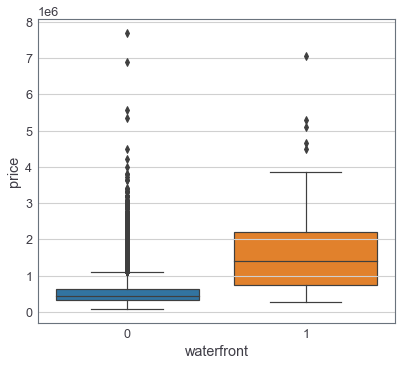

In [5]:
jtplot.style(theme='grade3') # adjust the plot theme
sns.boxplot(x='waterfront', y ='price', data=df, palette='tab10')

**Question 5**: Use the function `regplot` in the seaborn library to determine if the feature "sqft_above" is negatively or positively correlated with price.

Text(0.5, 0, 'Square footage apart from basement')

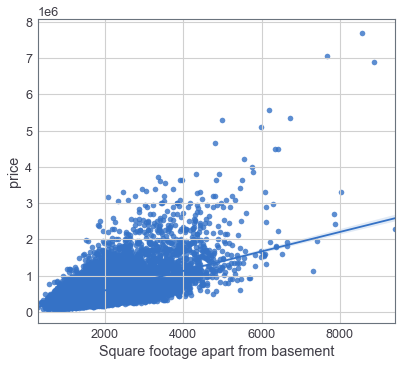

In [6]:
sns.regplot(x='sqft_above', y='price', data=df)
plt.xlabel('Square footage apart from basement')

**Question 6**: Fit a linear regression model to predict the price using the feature 'sqft_living' then calculate the R².

In [7]:
lr = LinearRegression()
lr.fit(df[['sqft_above']], df[['price']])
print(f"Linear regression R² = {round(lr.score(df[['sqft_above']], df[['price']]), 4)}")

Linear regression R² = 0.3667


**Question 7**: Fit a linear regression model to predict the 'price' using the list of features:

- `floors`
- `watefront`
- `lat`
- `bedrooms`
- `sqft_basement`
- `view`
- `bathrooms`
- `sqft_living15`
- `sqft_above`
- `grade`
- `sqft_living`

Then calculate the R².

In [8]:
mean = df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

mean = df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [9]:
features = df[["floors", "waterfront", "lat", "bedrooms",
               "sqft_basement", "view", "bathrooms", "sqft_living15",
               "sqft_above", "grade", "sqft_living"]]

mvlr = LinearRegression()
mvlr.fit(features, df[['price']])
print(f"Multivariable linear regression R² = {round(mvlr.score(features, df[['price']]), 4)}")

Multivariable linear regression R² = 0.6576


**Question 8**: Create a pipeline object that scales the data performs a polynomial transform and fits a linear regression model. Fit the object using the features in the question above, then fit the model and calculate the R².

In [10]:
Input=[('scale',StandardScaler()),
       ('polynomial', PolynomialFeatures(include_bias=False)),
       ('model',LinearRegression())]

housing_pipe = Pipeline(Input)
housing_pipe.fit(features, df[['price']])
print(f"R² = {round(mvlr.score(features, df[['price']]), 4)}")

R² = 0.6576


**Question 9**: Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the R².

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    features, 
    df[['price']], test_size=0.15, random_state=1)

rg_lr=Ridge(alpha=0.1)

rg_lr.fit(X_train, y_train)
print(f"Multivariable ridge regression R² = {round(rg_lr.score(X_test, y_test), 4)}")

Multivariable ridge regression R² = 0.6479


**Question 10**: Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, setting the regularisation parameter to 0.1. Calculate the R² utilising the test data provided.

In [12]:
poly_nom = PolynomialFeatures(degree=2)
X_train_pn = poly_nom.fit_transform(X_train)
X_test_pn = poly_nom.fit_transform(X_test)

pn_2ord = Ridge(alpha=0.1)
pn_2ord.fit(X_train_pn, y_train)
print(f"2nd order polynomial multivariable ridge regression R² = {round(pn_2ord.score(X_test_pn, y_test), 4)}")

2nd order polynomial multivariable ridge regression R² = 0.7003
